# Question 1

In [1]:
#IMPORT
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score, roc_curve
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [4]:
#READ FILE
dt = pd.read_csv('C:\\Users\\lee.jhsy\\Downloads\\Bank_Personal_Loan_Modelling.csv')

In [5]:
#CHECK DTYPE
dt.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [6]:
#STATISTICAL SUMMARY 1
dt.describe() 
#experience shouldn't be negative. Remove and Impute later. 

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [7]:
#SHAPE OF DATA
dt.shape #5000 rows and 14 columns

(5000, 14)

In [8]:
#CHECK NULL
dt.isnull().values.any() #No null values in dataset

False

In [10]:
#CHECK INCORRECT IMPUTATION
column = dt.columns[1:]
for i in column:
    print(i,'\n',dt[i].unique(),'\n\n')
#Shows negative numbers on Experience
#Shows ZIPCODE is missing a digit at end for some values. REMOVE THE ROWS since we can't impute ZIPCODE labels
#[Optional] Education can be replaced with actual nominal values "1: Undergrad; 2: Graduate; 3: Advanced/Professional" for later One Hot Encoding

Age 
 [25 45 39 35 37 53 50 34 65 29 48 59 67 60 38 42 46 55 56 57 44 36 43 40
 30 31 51 32 61 41 28 49 47 62 58 54 33 27 66 24 52 26 64 63 23] 


Experience 
 [ 1 19 15  9  8 13 27 24 10 39  5 23 32 41 30 14 18 21 28 31 11 16 20 35
  6 25  7 12 26 37 17  2 36 29  3 22 -1 34  0 38 40 33  4 -2 42 -3 43] 


Income 
 [ 49  34  11 100  45  29  72  22  81 180 105 114  40 112 130 193  21  25
  63  62  43 152  83 158  48 119  35  41  18  50 121  71 141  80  84  60
 132 104  52 194   8 131 190  44 139  93 188  39 125  32  20 115  69  85
 135  12 133  19  82 109  42  78  51 113 118  64 161  94  15  74  30  38
   9  92  61  73  70 149  98 128  31  58  54 124 163  24  79 134  23  13
 138 171 168  65  10 148 159 169 144 165  59  68  91 172  55 155  53  89
  28  75 170 120  99 111  33 129 122 150 195 110 101 191 140 153 173 174
  90 179 145 200 183 182  88 160 205 164  14 175 103 108 185 204 154 102
 192 202 162 142  95 184 181 143 123 178 198 201 203 189 151 199 224 218] 


ZIP Code 
 [91107 90089

# QUESTION 2

In [11]:
#Number of unique in each column?
column = dt.columns[:]
unique_dt = []
for i in column:
    data = len(dt[i].unique())
    unique_dt.append(data)
unique_dt = pd.DataFrame(unique_dt, index=column).T
unique_dt.head() #Shows #of unique values in each column

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,5000,45,47,162,467,4,108,3,347,2,2,2,2,2


In [12]:
#Number of people with zero mortgage?
zero_mortgage = dt[dt['Mortgage']==0]
zero_mortgage['Mortgage'].count() #Count of people with zero Mortgage = 3462

3462

In [13]:
#Number of people with zero credit card spending per month?
zero_CCAvg = dt[dt['CCAvg']==0]
zero_CCAvg['CCAvg'].count() #Count of people with zero credit card spending per month = 106

106

In [14]:
#Value counts of all categorical columns. 
#Cat columns are [8 columns] ID, ZIP Code, Education, Personal Loan, Securities Account, CD Account, Online, CreditCard
cat_column = ['ID','ZIP Code','Education','Personal Loan','Securities Account','CD Account','Online','CreditCard']
cat_unique_dt = []
for i in cat_column:
    cat_data = len(dt[i].unique())
    cat_unique_dt.append(cat_data)
cat_unique_dt = pd.DataFrame(cat_unique_dt, index=cat_column).T
cat_unique_dt.head() #Shows #of unique values in each column
#ZIP Code = 467, Education = 3, Personal Loan = 2, Securities Account = 2, CD Account = 2, Online = 2, CreditCard = 2

,ID,ZIP Code,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,5000,467,3,2,2,2,2,2


In [15]:
#Check for Peronsal Loan ratio
true = len(dt.loc[dt['Personal Loan'] == True])
false = len(dt.loc[dt['Personal Loan'] == False])
print("True cases: {0} ({1:2.2f}%)".format(true, (true / (true + false)) * 100 ))
print("False cases: {0} ({1:2.2f}%)".format(false, (false / (true + false)) * 100))

True cases: 480 (9.60%)
False cases: 4520 (90.40%)


Only approximately 10% took loans

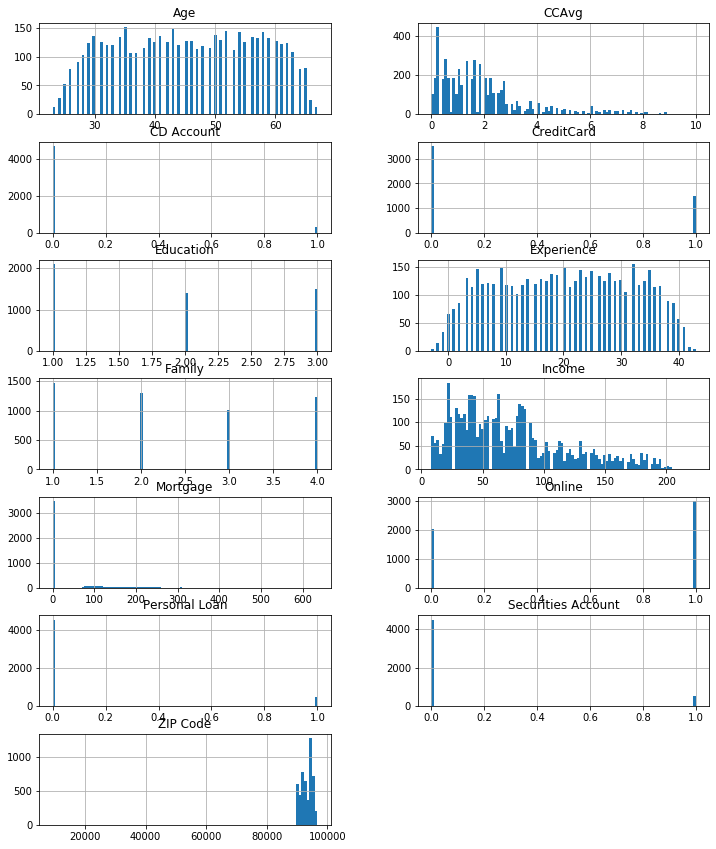

In [16]:
#Univariate
#look at Histogram excluding first column that is just indication of number of rows
columns = list(dt)[1:]
dt[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2)); 
#EXPERIENCE shows negative number which is not correct. Remove and IMPUTE later.
#ZIPCODE some are mislabeled. REMOVE ROW as ZIPCODE cannot be IMPUTED as being categorical.

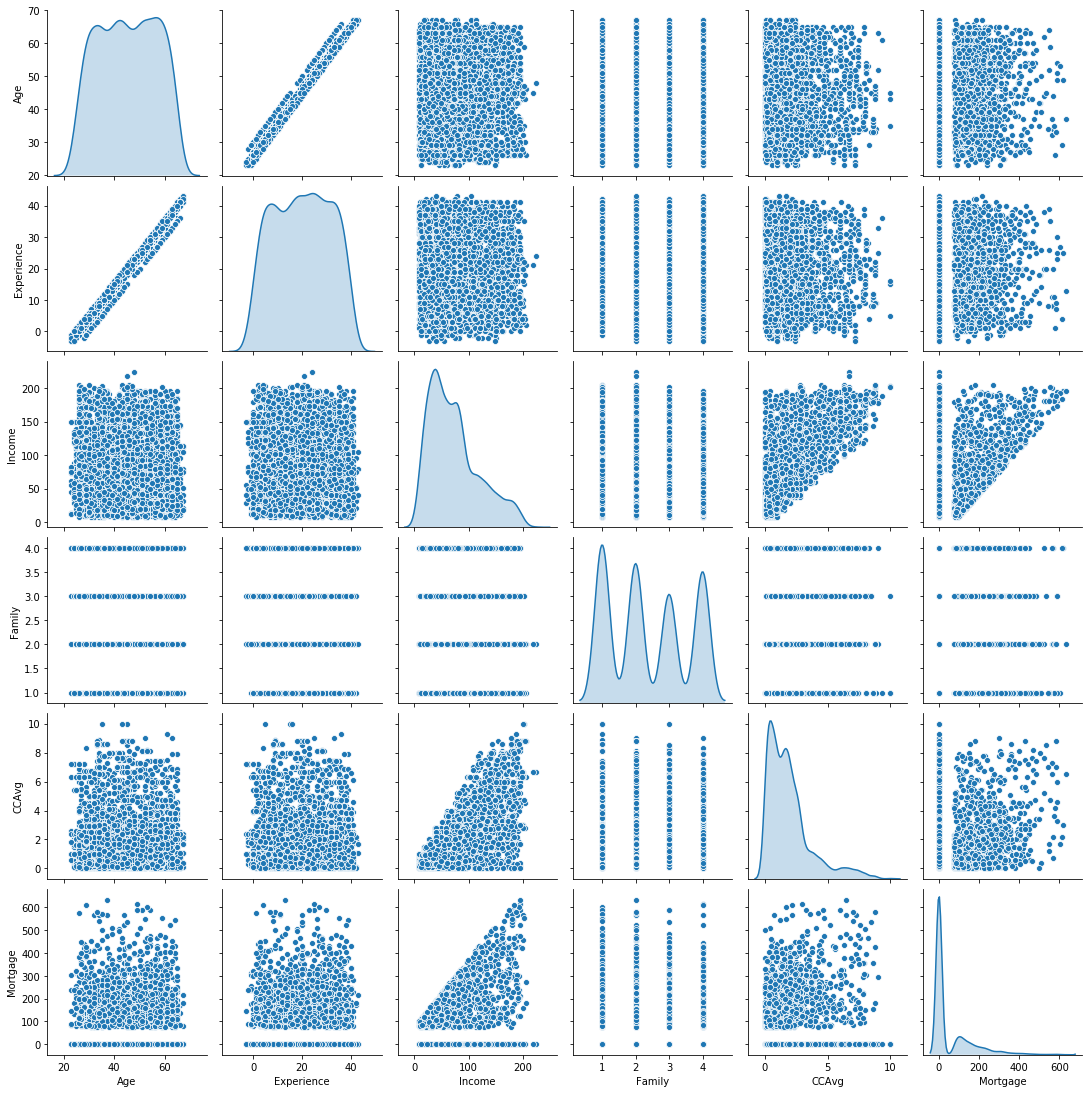

In [17]:
#Bivariate [Need to remove categorical columns]
cat_column = ['ID','ZIP Code','Education','Personal Loan','Securities Account','CD Account','Online','CreditCard']
non_cat_dt = dt.drop(cat_column, axis=1)
sns.pairplot(non_cat_dt,diag_kind='kde')

CLEAN UP DATA

In [18]:
#Get data model ready. CLEAN UP DATA
#dt_clean is copy of dt for NEW CLEAN/IMPUTE dataset
dt_clean = dt.copy() 
###Change Education to actual names
dt_clean['Education'] = dt_clean['Education'].replace({1: 'Undergrad', 2: 'Graduate', 3: 'Advanced/Professional'})

###Remove Zipcode row with missing values
dt_clean = dt_clean[dt_clean['ZIP Code'].astype(str).str.len()==5] 
print(np.sort(dt_clean['ZIP Code'].unique()),'\n\n') #To verify if there is any ZIP Code with four digits


###REMOVE AND INPUTE negative Experience
dt_clean=dt_clean.replace(to_replace=[-1,-2,-3], value=np.nan)
imp = SimpleImputer(missing_values=np.nan, strategy="mean")
cols=['Experience']
imputer = imp.fit(dt_clean[cols])
dt_clean[cols] = imputer.transform(dt_clean[cols])
print(dt_clean['Experience'].unique(),'\n\n')

###SET ID as INDEX
dt_clean.set_index('ID',inplace=True)


###BIN ZIPCODE
bin_edges = [90000, 90500, 91000,91500,92000, 92500, 93000, 93500, 94000, 94500, 95000, 95500, 96000, 96500, 97000]         # edges to define intervals
bin_labels = ['90000-90500', '90501-91000', '91001-91500','91501-92000', '92001-92500', '92501-93000',
              '93001-93500','93501-94000', '94001-94500', '94501-95000', '95001-95500', '95501-96000'
             , '96001-96500', '96501-97000']               # labels to denote each interval
dt_clean['ZIP Code'] = pd.cut(dt_clean['ZIP Code'], bins=bin_edges , labels=bin_labels) #turns ZIP Code to Categorical
#Calculate baseline proportion - ratio of Yes to No to identify data imbalance
ratio = dt_clean['ZIP Code'].value_counts(normalize=True)
print(ratio,'\n\n')


###Convert rest categorical columns to Category Dtype
cat_column1 = ['Education','Personal Loan','Securities Account','CD Account','Online','CreditCard']
dt_clean[cat_column1] = dt_clean[cat_column1].astype('category')

###Hot one Encode on all categorical
dt_clean = pd.get_dummies(dt_clean, drop_first=True)
print(dt_clean[dt_clean.columns[6:-7]].apply(pd.Series.value_counts),'\n\n') #Check cnt of zipcode bin
dt_clean.head()



#### All the Zero values in Age, Experience, Mortgage possibly be True values so not imputing or removing.

[90005 90007 90009 90011 90016 90018 90019 90024 90025 90027 90028 90029
 90032 90033 90034 90035 90036 90037 90041 90044 90045 90048 90049 90057
 90058 90059 90064 90065 90066 90068 90071 90073 90086 90089 90095 90210
 90212 90230 90232 90245 90250 90254 90266 90272 90274 90275 90277 90280
 90291 90304 90401 90404 90405 90502 90503 90504 90505 90509 90601 90623
 90630 90638 90639 90640 90650 90717 90720 90740 90745 90747 90755 90813
 90840 91006 91007 91016 91024 91030 91040 91101 91103 91105 91107 91109
 91116 91125 91129 91203 91207 91301 91302 91304 91311 91320 91326 91330
 91335 91342 91343 91345 91355 91360 91361 91365 91367 91380 91401 91423
 91604 91605 91614 91706 91709 91710 91711 91730 91741 91745 91754 91763
 91765 91768 91770 91773 91775 91784 91791 91801 91902 91910 91911 91941
 91942 91950 92007 92008 92009 92024 92028 92029 92037 92038 92054 92056
 92064 92068 92069 92084 92093 92096 92101 92103 92104 92106 92109 92110
 92115 92116 92120 92121 92122 92123 92124 92126 92

,Age,Experience,Income,Family,CCAvg,Mortgage,ZIP Code_90501-91000,ZIP Code_91001-91500,ZIP Code_91501-92000,ZIP Code_92001-92500,...,ZIP Code_95501-96000,ZIP Code_96001-96500,ZIP Code_96501-97000,Education_Graduate,Education_Undergrad,Personal Loan_1,Securities Account_1,CD Account_1,Online_1,CreditCard_1
ID,,,,,,,,,,,,,,,,,,,,,
1,25,1.0,49,4,1.6,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
2,45,19.0,34,3,1.5,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,39,15.0,11,1,1.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,35,9.0,100,1,2.7,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,35,8.0,45,4,1.0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


In [19]:
dt_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4999 entries, 1 to 5000
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   4999 non-null   int64  
 1   Experience            4999 non-null   float64
 2   Income                4999 non-null   int64  
 3   Family                4999 non-null   int64  
 4   CCAvg                 4999 non-null   float64
 5   Mortgage              4999 non-null   int64  
 6   ZIP Code_90501-91000  4999 non-null   uint8  
 7   ZIP Code_91001-91500  4999 non-null   uint8  
 8   ZIP Code_91501-92000  4999 non-null   uint8  
 9   ZIP Code_92001-92500  4999 non-null   uint8  
 10  ZIP Code_92501-93000  4999 non-null   uint8  
 11  ZIP Code_93001-93500  4999 non-null   uint8  
 12  ZIP Code_93501-94000  4999 non-null   uint8  
 13  ZIP Code_94001-94500  4999 non-null   uint8  
 14  ZIP Code_94501-95000  4999 non-null   uint8  
 15  ZIP Code_95001-95500 

# Question 3

In [20]:
#Split the data into training and test set in the ratio of 70:30 respectively
seed = 123
X_train, X_test, y_train, y_test = train_test_split(dt_clean.drop('Personal Loan_1',axis=1), dt_clean['Personal Loan_1'], test_size=0.30,random_state=seed)

In [21]:
print("training set = {0:0.2f}%".format((len(X_train)/len(dt_clean.index)) * 100))
print("test set = {0:0.2f}%".format((len(X_test)/len(dt_clean.index)) * 100))

training set = 69.99%
test set = 30.01%


In [22]:
print("Original Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(dt_clean.loc[dt_clean['Personal Loan_1'] == 1]), (len(dt_clean.loc[dt_clean['Personal Loan_1'] == 1])/len(dt_clean.index)) * 100))
print("Original Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(dt_clean.loc[dt_clean['Personal Loan_1'] == 0]), (len(dt_clean.loc[dt_clean['Personal Loan_1'] == 0])/len(dt_clean.index)) * 100))
print("")
print("Training Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Personal Loan True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Personal Loan False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Personal Loan True Values    : 480 (9.60%)
Original Personal Loan False Values   : 4519 (90.40%)

Training Personal Loan True Values    : 329 (9.40%)
Training Personal Loan False Values   : 3170 (90.60%)

Test Personal Loan True Values        : 151 (10.07%)
Test Personal Loan False Values       : 1349 (89.93%)



Well distributed test set and training set

# Question 4

In [23]:
#Use Logistic Regression model to predict whether the customer will take personal loan or not. Print all the metrics related for evaluating the model performance

# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

model_score = model.score(X_test, y_test)
print('Accuracy = ',model_score)
print(X_test.shape, y_test.shape)

Accuracy =  0.9546666666666667
(1500, 25) (1500,)


Model score comes out to be 0.95 accuracy


Trainig accuracy 0.9599885681623321

Testing accuracy 0.9546666666666667

Recall: 0.6158940397350994

Precision: 0.9029126213592233

F1 Score: 0.7322834645669292

Roc Auc Score: 0.804240570645904


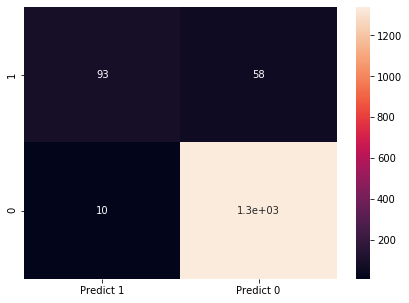

In [24]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

y_predict = model.predict_proba(X_test)[:,1] > 0.5
print("Trainig accuracy",model.score(X_train,y_train))  
print()
print("Testing accuracy",model.score(X_test, y_test))
print()
print("Recall:",recall_score(y_test,y_predict)) #This is what we are looking for since False negative are critical to business that it will miss liability customers who are willing to take loans
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

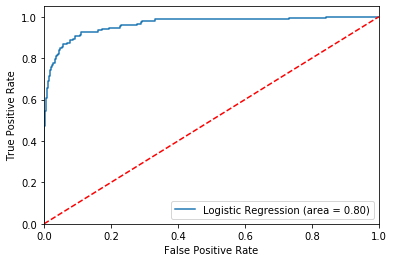

In [25]:
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [26]:
logit = sm.Logit( y_train, sm.add_constant( X_train ) )
lg = logit.fit()
lg.summary()

         Current function value: inf
         Iterations: 35


C:\Users\lee.jhsy\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\lee.jhsy\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\lee.jhsy\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\lee.jhsy\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\lee.jhsy\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        Personal Loan_1   No. Observations:                 3499
Model:                          Logit   Df Residuals:                     3473
Method:                           MLE   Df Model:                           25
Date:                Thu, 17 Sep 2020   Pseudo R-squ.:                     inf
Time:                        16:23:58   Log-Likelihood:                   -inf
converged:                      False   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -10.4379      1.347     -7.746      0.000     -13.079      -7.797
Age                      0.0575      0.046      1.262      0.207      -0.032       0.147
Experience              -0.0461      0.046     -1.007      0.314      -0.136       0.044
Income                   0.0596      0.004     16.847      0.000       0.053       0.067
Family                   0.5720      0.093      6.133      0.000       0.389       0.755
CCAvg                    0.1435      0.053      2.693      0.007       0.039       0.248
Mortgage              1.343e-05      0.001      0.019      0.985      -0.001       0.001
ZIP Code_90501-91000     0.6288      0.602      1.044      0.296      -0.551       1.809
ZIP Code_91001-91500     0.0523      0.420      0.124      0.901      -0.771       0.876
ZIP Code_91501-92000    -0.3337      0.548     -0.609      0.543      -1.408       0.741
ZIP Code_92001-92500     0.0361      0.386      0.094      0.925      -0.720       0.792
ZIP Code_92501-93000     0.0306      0.410      0.075      0.941      -0.773       0.835
ZIP Code_93001-93500     0.2531      0.481      0.526      0.599      -0.689       1.195
ZIP Code_93501-94000    -0.8265      0.695     -1.189      0.235      -2.189       0.536
ZIP Code_94001-94500    -0.1620      0.357     -0.453      0.650      -0.863       0.539
ZIP Code_94501-95000    -0.0548      0.359     -0.153      0.878      -0.758       0.648
ZIP Code_95001-95500     0.3997      0.395      1.011      0.312      -0.375       1.175
ZIP Code_95501-96000    -0.2564      0.453     -0.566      0.571      -1.144       0.631
ZIP Code_96001-96500    -2.3662      3.454     -0.685      0.493      -9.135       4.403
ZIP Code_96501-97000   -11.9722   2772.502     -0.004      0.997   -5445.977    5422.033
Education_Graduate      -0.0937      0.229     -0.409      0.682      -0.543       0.355
Education_Undergrad     -4.0132      0.317    -12.649      0.000      -4.635      -3.391
Securities Account_1    -0.8710      0.359     -2.426      0.015      -1.575      -0.167
CD Account_1             4.0755      0.423      9.635      0.000       3.246       4.905
Online_1                -0.7260      0.201     -3.611      0.000      -1.120      -0.332
CreditCard_1            -1.0781      0.268     -4.020      0.000      -1.604      -0.553
========================================================================================

Possibly complete quasi-separation: A fraction 0.10 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Can try running model again after removing features with high p-values one by one to see if recall value gets better

In [27]:
y_pred_df = pd.DataFrame()
y_pred_df['actual'] = y_test
y_pred_df["predicted_prob"] = lg.predict( sm.add_constant( X_test ) )
## Used statsmodel logit function to predict probaility of output being from class '1'
y_pred_df['predicted'] = y_pred_df.predicted_prob.map( lambda x: 1 if x > 0.6 else 0)
# Converted values which are above 0.6 as '1' and rest as '0'.
## Therefore thershold here is 0.6 as values above 0.6 probability is converted to '1'
y_pred_df[y_pred_df['predicted_prob']>0.6]

,actual,predicted_prob,predicted
ID,,,
2833,1,0.989289,1
1584,1,0.999267,1
672,1,0.749010,1
2542,1,0.879889,1
3277,1,0.874813,1
...,...,...,...
4125,1,0.701235,1
248,1,0.971280,1
738,1,0.607564,1


Total Accuracy :  0.95


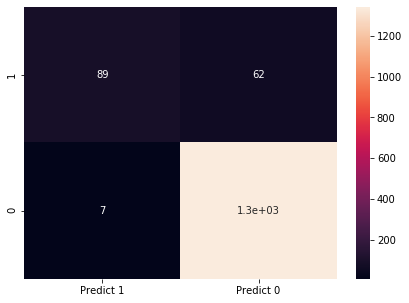

In [28]:
ccm=metrics.confusion_matrix(y_pred_df.actual, y_pred_df.predicted, labels=[1, 0])
df_ccm = pd.DataFrame(ccm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_ccm, annot=True)
print( 'Total Accuracy : ',np.round( accuracy_score( y_test, y_pred_df.predicted ), 2 ) )

Above model recall value is not better than first model with 58% where as recall on first model was 61.5%

In [36]:
##Calculate VIF values
X_values = dt_clean.values
X_values = np.hstack((np.ones((len(dt_clean), 1)), X_values))
for index, feature in enumerate(['constant']+dt_clean.columns.tolist()):
    vif_value = vif(X_values, index)
    print(f"{feature}: {vif_value}", sep="\t")

constant: 137.219512120957
Age: 22.024858928494947
Experience: 21.99356240485026
Income: 2.2557542947970646
Family: 1.0719335841513415
CCAvg: 1.733979068400044
Mortgage: 1.0534198195678832
ZIP Code_90501-91000: 1.200577175866025
ZIP Code_91001-91500: 1.490006181820214
ZIP Code_91501-92000: 1.3300504295347042
ZIP Code_92001-92500: 1.8194873557229811
ZIP Code_92501-93000: 1.5353580337375756
ZIP Code_93001-93500: 1.3714082961835672
ZIP Code_93501-94000: 1.2460247998717393
ZIP Code_94001-94500: 1.9947993877295862
ZIP Code_94501-95000: 1.9124649343246463
ZIP Code_95001-95500: 1.5946693585559482
ZIP Code_95501-96000: 1.5630288567105
ZIP Code_96001-96500: 1.0536676449780882
ZIP Code_96501-97000: 1.0116331735989321
Education_Graduate: 1.4170524325623193
Education_Undergrad: 1.5704145672973706
Personal Loan_1: 1.660199320007141
Securities Account_1: 1.1445289340523155
CD Account_1: 1.4493588444683938
Online_1: 1.0483090308219336
CreditCard_1: 1.1188561878410683


High VIF value features can be removed and try model again

# Question 5

In [30]:
## Check different parameters of Logistic Regression and give your reasoning whether the model performance is affected due to it or not
#Use different parameters in Logistic Regression [penalty=, solver=, class_weight=, C=, fit_intercept=] to get better RECALL

###Model 1


# penalty_ls = []
C_ls = []
solver_ls = []
train_score = []
test_score = []
train_recall = []
test_recall = []
recall = []
# penalty = ['l1','l2']
C = [0.5, 0.7, 0.9]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
# for i in penalty:
for j in C:
    for k in solver:
        logR = LogisticRegression(random_state=123, C = j,solver=k)  # changing values of solver
        logR.fit(X_train, y_train) 
        y_predict_2 = logR.predict(X_test)     
        train_score.append(round(logR.score(X_train, y_train),3))
        test_score.append(round(logR.score(X_test, y_test),3))
#             penalty_ls.append(i)
        C_ls.append(j)
        solver_ls.append(k)
        recall.append(recall_score(y_test,y_predict_2))

# print(penalty_ls,'\n')
print(C_ls,'\n')
print(solver_ls,'\n')
print(train_score,'\n')
print(test_score,'\n')
print(recall,'\n')     


df = pd.DataFrame(list(zip(C_ls, solver_ls,train_score,test_score,recall)), 
               columns =['Threshold', 'Solver', 'train_acc', 'test_acc', 'recall']) 

df.loc[df['recall']==df['recall'].max()] #Picked on with highest Recall value

C:\Users\lee.jhsy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\lee.jhsy\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\lee.jhsy\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\lee.jhsy\anaconda3\lib\si

[0.5, 0.5, 0.5, 0.5, 0.5, 0.7, 0.7, 0.7, 0.7, 0.7, 0.9, 0.9, 0.9, 0.9, 0.9] 

['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga', 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga', 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'] 

[0.959, 0.959, 0.958, 0.903, 0.901, 0.959, 0.957, 0.959, 0.903, 0.901, 0.96, 0.955, 0.959, 0.903, 0.901] 

[0.955, 0.953, 0.953, 0.895, 0.895, 0.956, 0.952, 0.954, 0.895, 0.895, 0.957, 0.945, 0.954, 0.895, 0.895] 

[0.6225165562913907, 0.6225165562913907, 0.5960264900662252, 0.23841059602649006, 0.23841059602649006, 0.6291390728476821, 0.6423841059602649, 0.6026490066225165, 0.23841059602649006, 0.23841059602649006, 0.6423841059602649, 0.6026490066225165, 0.609271523178808, 0.23841059602649006, 0.23841059602649006] 



C:\Users\lee.jhsy\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


,Threshold,Solver,train_acc,test_acc,recall
6,0.7,lbfgs,0.957,0.952,0.642384
10,0.9,newton-cg,0.960,0.957,0.642384


Above tables are parameters giving highest recall output

In [31]:
#Try modeling again removing ZIP codes that have high p-value
dt_clean2 = dt_clean.copy()
dt_clean2 = dt_clean2[dt_clean2.columns[:6].append(dt_clean2.columns[-7:])] #remove zipcode

In [32]:
###MODEL 2
#Split the data into training and test set in the ratio of 70:30 respectively
seed = 123
X_train2, X_test2, y_train2, y_test2 = train_test_split(dt_clean2.drop('Personal Loan_1',axis=1), dt_clean2['Personal Loan_1'], test_size=0.30,random_state=seed)

# penalty_ls = []
C_ls2 = []
solver_ls2 = []
train_score2 = []
test_score2 = []
train_recall2 = []
test_recall2 = []
recall2 = []
# penalty = ['l1','l2']
C = [0.5, 0.7, 0.9]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
# for i in penalty:
for j in C:
    for k in solver:
        logR = LogisticRegression(random_state=123, C = j,solver=k)  # changing values of solver
        logR.fit(X_train2, y_train2) 
        y_predict_3 = logR.predict(X_test2)     
        train_score2.append(round(logR.score(X_train2, y_train2),3))
        test_score2.append(round(logR.score(X_test2, y_test2),3))
#             penalty_ls.append(i)
        C_ls2.append(j)
        solver_ls2.append(k)
        recall2.append(recall_score(y_test2,y_predict_3))

# print(penalty_ls,'\n')
print(C_ls2,'\n')
print(solver_ls2,'\n')
print(train_score2,'\n')
print(test_score2,'\n')
print(recall2,'\n')   

df2 = pd.DataFrame(list(zip(C_ls2, solver_ls2,train_score2,test_score2,recall2)), 
               columns =['Threshold', 'Solver', 'train_acc', 'test_acc', 'recall']) 

df2.loc[df2['recall']==df2['recall'].max()] #Calculate the highest recall value

C:\Users\lee.jhsy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\lee.jhsy\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\lee.jhsy\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\lee.jhsy\anaconda3\lib\si

[0.5, 0.5, 0.5, 0.5, 0.5, 0.7, 0.7, 0.7, 0.7, 0.7, 0.9, 0.9, 0.9, 0.9, 0.9] 

['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga', 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga', 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'] 

[0.959, 0.957, 0.956, 0.903, 0.901, 0.959, 0.955, 0.959, 0.903, 0.901, 0.959, 0.955, 0.959, 0.903, 0.901] 

[0.955, 0.948, 0.953, 0.895, 0.895, 0.955, 0.949, 0.955, 0.895, 0.895, 0.955, 0.953, 0.956, 0.895, 0.895] 

[0.6225165562913907, 0.6225165562913907, 0.6026490066225165, 0.23841059602649006, 0.23841059602649006, 0.6225165562913907, 0.5894039735099338, 0.609271523178808, 0.23841059602649006, 0.23841059602649006, 0.6291390728476821, 0.5960264900662252, 0.6225165562913907, 0.23841059602649006, 0.23841059602649006] 



C:\Users\lee.jhsy\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\lee.jhsy\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


,Threshold,Solver,train_acc,test_acc,recall
10,0.9,newton-cg,0.959,0.955,0.629139


Removing ZIP Codes made Recall worse. Model 2 is worse than Model 1. 
Above parameters give the highest recall value but Model 1 is still the highest

In [33]:
#Try modeling again removing Age and Experience that are high in VIF value
dt_clean3 = dt_clean.copy()
dt_clean3 = dt_clean3[dt_clean3.columns[2:]]


In [34]:
###MODEL 3
#Split the data into training and test set in the ratio of 70:30 respectively
seed = 123
X_train3, X_test3, y_train3, y_test3 = train_test_split(dt_clean3.drop('Personal Loan_1',axis=1), dt_clean3['Personal Loan_1'], test_size=0.30,random_state=seed)

# penalty_ls = []
C_ls3 = []
solver_ls3 = []
train_score3 = []
test_score3 = []
train_recall3 = []
test_recall3 = []
recall3 = []
# penalty = ['l1','l2']
C = [0.5, 0.7, 0.9]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
# for i in penalty:
for j in C:
    for k in solver:
        logR = LogisticRegression(random_state=123, C = j,solver=k)  # changing values of solver
        logR.fit(X_train3, y_train3) 
        y_predict_4 = logR.predict(X_test3)     
        train_score3.append(round(logR.score(X_train3, y_train3),3))
        test_score3.append(round(logR.score(X_test3, y_test3),3))
#             penalty_ls.append(i)
        C_ls3.append(j)
        solver_ls3.append(k)
        recall3.append(recall_score(y_test3,y_predict_4))

# print(penalty_ls,'\n')
print(C_ls3,'\n')
print(solver_ls3,'\n')
print(train_score3,'\n')
print(test_score3,'\n')
print(recall3,'\n')   

df3 = pd.DataFrame(list(zip(C_ls3, solver_ls3,train_score3,test_score3,recall3)), 
               columns =['Threshold', 'Solver', 'train_acc', 'test_acc', 'recall']) 

df3.loc[df3['recall']==df3['recall'].max()] #Parameters with highest Recall value

C:\Users\lee.jhsy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\lee.jhsy\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\lee.jhsy\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\lee.jhsy\anaconda3\lib\si

[0.5, 0.5, 0.5, 0.5, 0.5, 0.7, 0.7, 0.7, 0.7, 0.7, 0.9, 0.9, 0.9, 0.9, 0.9] 

['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga', 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga', 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'] 

[0.96, 0.96, 0.96, 0.906, 0.906, 0.96, 0.961, 0.96, 0.906, 0.906, 0.96, 0.961, 0.961, 0.906, 0.906] 

[0.957, 0.952, 0.953, 0.899, 0.899, 0.957, 0.953, 0.953, 0.899, 0.899, 0.957, 0.953, 0.955, 0.899, 0.899] 

[0.6357615894039735, 0.5894039735099338, 0.5894039735099338, 0.0, 0.0, 0.6423841059602649, 0.609271523178808, 0.5960264900662252, 0.0, 0.0, 0.6423841059602649, 0.609271523178808, 0.609271523178808, 0.0, 0.0] 



C:\Users\lee.jhsy\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


,Threshold,Solver,train_acc,test_acc,recall
5,0.7,newton-cg,0.96,0.957,0.642384
10,0.9,newton-cg,0.96,0.957,0.642384


#### Model 1 has the highest recall value

#### As result, each change in parameter impacts recall value due to difference threshold and type of logistic regression solver to model

# Question 6

#### The whole purpose of this prediction is to catch all of potential customers who are well qualified to get loans. 
In this case, Recall is more important because catching the potential customers who are willing to take personal loans will make company big money over the ones who aren't going to take personal loans.



In [35]:
df.loc[df['recall']==df['recall'].max()] 

,Threshold,Solver,train_acc,test_acc,recall
6,0.7,lbfgs,0.957,0.952,0.642384
10,0.9,newton-cg,0.960,0.957,0.642384


### This model was able to catch 64% of customers who are liable to take personal loans, while others were False Negative classified. This means that other 36% might have get missed to make bank more money.